# Projeto - Análise de Texto de Fontes Desestruturadas e Web
----------
**Aluna:** Gabriela Mitu

### Introdução
O objetivo principal deste projeto é extrair informações de produtos diretamente do site Pelando (https://www.pelando.com.br/) utilizando técnicas de web scraping e processamento de imagem. Será utilizada a biblioteca BeautifulSoup para a extração de informações sobre os produtos do site da empresa:
- Título do produto
- Preço
- Marca
- Temperatura
- Número de comentários

Neste caso, a "Temperatura" é equivalente aos likes das pessoas. Ou seja, quanto mais quente (maior a temperatura), mais em alta está o produto.

Em conjunto com o BeautifulSoup, será utilizado o Selenium para a possibilitar a extração de dados no site, o qual usa Javascript, o que significa que as informações podem não estar presentes no HTML imediatamente. Desta forma, o Selenium pode ser usado para executar o Javascript da página e fazer com que as informações sejam adicionadas ao HTML, para que possam ser analisadas pelo Beautiful Soup.

Em seguida, será possível utilizar a biblioteca Pandas para organizar esses dados em um Dataframe a fim de estudar o que leva um produto a aparecer primeiro nas buscas ou ter determinado preço. Serão usadas técnicas de análise de dados, como correlação e regressão para identificar padrões e relações entre as informações coletadas, assim como analisar as marcas presentes na descrição do produto para entender quais são as marcas priorizadas nas buscas.

**Obs.:** Não foram feitas análises sobre os Preços dos produtos, afinal, eles são muito variados em razão de que os produtos em si são diversificados, apenas ficam disponíveis aleatoriamente pelas promoções oferecidas pelas empresas.


### Bibliotecas Utilizadas

In [56]:
# para nos comunicarmos com a Web
import requests

# para extrair informações de páginas HTML
import bs4
from bs4 import BeautifulSoup

# Para criar um Data Frame
import pandas as pd

# Renderizar HTML
import IPython

# Para fazer análises
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [9]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.set_page_load_timeout(60)

### Extração de dados do site Pelando

In [10]:
url = 'https://www.pelando.com.br/'
driver.get(url)
driver.implicitly_wait(10)
print(driver.page_source)

<html lang="pt"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width"><title>As Melhores Ofertas, Cupons de Descontos e Promoções | Pelando</title><meta property="og:title" content="As Melhores Ofertas, Cupons de Descontos e Promoções | Pelando"><meta name="description" content="Que tal encontrar as melhores ofertas, promoções e descontos do Brasil em apenas um lugar? Participe da nossa comunidade de caçadores de promoções!"><meta property="og:description" content="Que tal encontrar as melhores ofertas, promoções e descontos do Brasil em apenas um lugar? Participe da nossa comunidade de caçadores de promoções!"><link rel="canonical" href="https://pelando.com.br"><meta property="og:url" content="https://pelando.com.br"><meta name="robots" content="index, follow"><link rel="alternate" type="application/rss+xml" href="https://www.pelando.com.br/rss/highlights"><meta property="og:type" content="website"><meta property="og:image" content="https://www.pelando.com.br/

In [20]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
soup

<html lang="pt"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><title>As Melhores Ofertas, Cupons de Descontos e Promoções | Pelando</title><meta content="As Melhores Ofertas, Cupons de Descontos e Promoções | Pelando" property="og:title"/><meta content="Que tal encontrar as melhores ofertas, promoções e descontos do Brasil em apenas um lugar? Participe da nossa comunidade de caçadores de promoções!" name="description"/><meta content="Que tal encontrar as melhores ofertas, promoções e descontos do Brasil em apenas um lugar? Participe da nossa comunidade de caçadores de promoções!" property="og:description"/><link href="https://pelando.com.br" rel="canonical"/><meta content="https://pelando.com.br" property="og:url"/><meta content="index, follow" name="robots"/><link href="https://www.pelando.com.br/rss/highlights" rel="alternate" type="application/rss+xml"/><meta content="website" property="og:type"/><meta content="https://www.pelando.com.br/favicon.sv

### Montagem do Dataframe

In [21]:
lista_itens = soup.find_all("li", class_="sc-d9d3f8cd-2 bqJHKS")

In [22]:
lista_titulo = []
lista_preco = []
lista_marca = []
lista_temp = []
lista_comentarios = []

for i in range(0, len(lista_itens)):    
    tag_produto = lista_itens[i]

    ## LISTA DE TITULOS
    if (tag_produto.find("a", class_="sc-eeMvmM cfDrVO")) == None:
        titulo = "Sem título"
    else:
        titulo = tag_produto.find("a", class_="sc-eeMvmM cfDrVO").text
        titulo = titulo.replace('\n', '') 
    lista_titulo.append(titulo)

    ## LISTA DE PREÇOS
    if (tag_produto.find("div", class_="sc-cCjUiG VfhkW sc-cOxWqc hDLYmR")) == None:
        preco = "Sem preço"
    else:
        preco = tag_produto.find("div", class_="sc-cCjUiG VfhkW sc-cOxWqc hDLYmR").text  
    lista_preco.append(preco)
    
    ## LISTA DE MARCAS
    if (tag_produto.find("a", class_="sc-dPWrhe jVoxjr")) == None:
        marca = "Sem Marca"
    else:
        marca = tag_produto.find("a", class_="sc-dPWrhe jVoxjr").text 
    lista_marca.append(marca)
    
    ## LISTA DE TEMPERATURAS
    if (tag_produto.find("span", class_="sc-fXqpFg bPUkPH")) == None:
        if (tag_produto.find("span", class_="sc-fXqpFg eJQOky")) == None:
            temp = "Sem Temperatura"
        else:
            temp = tag_produto.find("span", class_="sc-fXqpFg eJQOky").text
    else:
        temp = tag_produto.find("span", class_="sc-fXqpFg bPUkPH").text 
    lista_temp.append(temp)
    
    ## LISTA DE COMENTARIOS
    if (tag_produto.find("a", class_="sc-hBxehG esnZrr sc-jTjUTQ hWqDSO")) == None:
        comentario = "Sem Comentarios"
    else:
        comentario = tag_produto.find("a", class_="sc-hBxehG esnZrr sc-jTjUTQ hWqDSO").text 
    lista_comentarios.append(comentario)
    

In [23]:
df = pd.DataFrame({'Titulo': lista_titulo,
                   'Preço': lista_preco,
                   'Marca': lista_marca,
                   'Temperatura': lista_temp,
                   'Num de Comentários': lista_comentarios
                  })
df

,Titulo,Preço,Marca,Temperatura,Num de Comentários
0,Esponja Microfibra para limpar Vidros multiuso...,"R$ 1,70",Amazon,304º,3
1,Cadeira de escritório TGTTGT-OFC-001 TGT pre...,R$ 189,Pichau,187º,3
2,Creatina 300g (100% pura) - Max Titanium,"R$ 99,85",Amazon,235º,1
3,Noviça Balde com Escorredor Concept Capacidade...,"R$ 25,46",Amazon,212º,3
4,Papel Higiênico Neutro Folha Dupla Personal 30...,R$ 16,Mercado Livre,413º,6
...,...,...,...,...,...
120,Samsung (MZ-V8V500B/AM) 980 SSD 500 GB - M.2 N...,R$ 363,Amazon,423º,4
121,"3 meses de Kindle Unlimited por R$1,99 para no...","R$ 1,99",Amazon,834º,25
122,Base Suporte Notebook Regulável Refrigerada Ga...,"R$ 45,82",Americanas,407º,6
123,Mochila Reforçada Impermeável Masculina Femini...,R$ 119,Mercado Livre,425º,13


### Salvando o Dataframe em um CSV

In [24]:
df.to_csv('pelando.csv', index=False)

Para evitar que seja necessário rodar sempre as tabelas acima para obter os dados e manter a mesma análise dos produtos. Será feito o estudo em cima deste csv:

In [2]:
df = pd.read_csv('pelando.csv')
df.head()

,Titulo,Preço,Marca,Temperatura,Num de Comentários
0,Esponja Microfibra para limpar Vidros multiuso...,"R$ 1,70",Amazon,304º,3
1,Cadeira de escritório TGTTGT-OFC-001 TGT pre...,R$ 189,Pichau,187º,3
2,Creatina 300g (100% pura) - Max Titanium,"R$ 99,85",Amazon,235º,1
3,Noviça Balde com Escorredor Concept Capacidade...,"R$ 25,46",Amazon,212º,3
4,Papel Higiênico Neutro Folha Dupla Personal 30...,R$ 16,Mercado Livre,413º,6


### Análise geral

In [3]:
df.describe()

,Titulo,Preço,Marca,Temperatura,Num de Comentários
count,125,125,125,125,125
unique,121,111,30,115,37
top,Sem título,Sem preço,Amazon,Sem Temperatura,11
freq,5,5,24,5,7


Com esta tabela é possível fazer algumas observações. Por exemplo, apesar de haver 125 produtos para análise no csv, 5 produtos não irão fazer parte, pois não apresentam nem título, nem preço. Provavelmente também não apresentam as outras informações. Isso ocorreu por conta de alguns espaços em branco que aparecem entre os produtos ao fazer scroll na página e o carregamento de mais produtos resultam nisso:

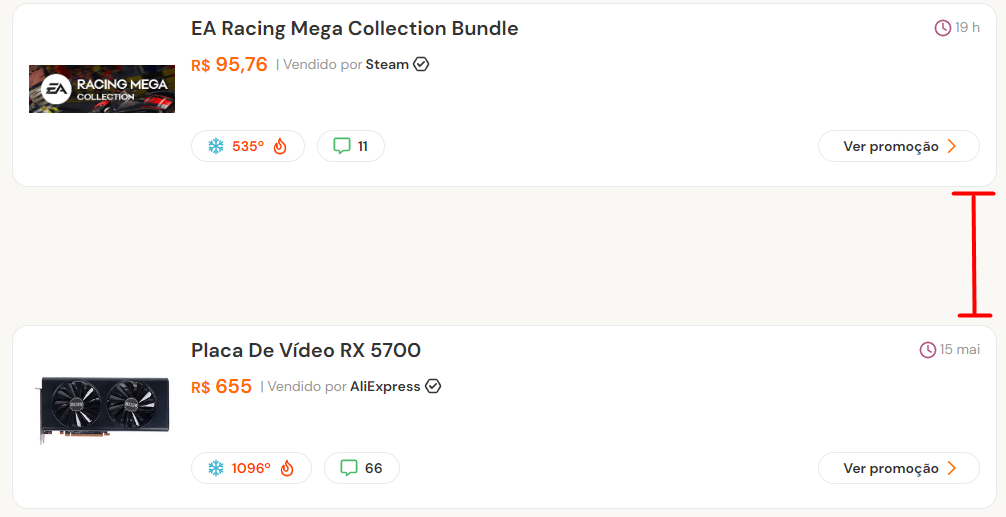

Outro ponto a se observar é que a marca que mais aparece é a Amazon, representando 20% das marcas que aparecem. E o número de comentários mais frequente é de 11, o que mostra boa participação dos clientes como feedback dos produtos

### Análise sobre Marca

Para explorar um pouco mais das variedades das marcas e suas frequências, é feito um value_counts:

In [4]:
print(f"Quantidade de marcas: {df['Marca'].nunique()}")

Quantidade de marcas: 30


In [5]:
df['Marca'].value_counts()

Amazon               24
AliExpress           17
Casas Bahia          11
Ponto Frio            9
Americanas            8
KaBuM!                7
Sem Marca             6
Samsung               6
Mercado Livre         5
Extra                 5
Netshoes              4
Pichau                2
Kaspersky             2
Centauro              2
Terabyte Shop         2
Steam                 1
Casa e Construção     1
Indiegala             1
Web Continental       1
Nike                  1
Udemy                 1
Loja Xbox Games       1
Hering Outlet         1
Lenovo                1
Olympikus             1
Pão de Açucar         1
Apple                 1
Magazine Luiza        1
Boticário             1
Carrefour             1
Name: Marca, dtype: int64

Grande parte das marcas possui apenas uma ou duas aparições no Dataframe, sendo que as que mais se destacam com mais de 10, são Amazon, AliExpress e Casas Bahia.

### Análise sobre Temperatura

A fim de analisar a tabela pelas maiores temperaturas, é necessário primeiramente retirar o símbolo de "°" para transformar a coluna de Temperatura de "object" para "int" e ordená-lo.

In [6]:
# Remover o símbolo "°" da coluna 'Temperatura'
df['Temperatura'] = df['Temperatura'].str.replace('º', '')

# Exibir as primeiras linhas do DataFrame atualizado
df.head()

,Titulo,Preço,Marca,Temperatura,Num de Comentários
0,Esponja Microfibra para limpar Vidros multiuso...,"R$ 1,70",Amazon,304,3
1,Cadeira de escritório TGTTGT-OFC-001 TGT pre...,R$ 189,Pichau,187,3
2,Creatina 300g (100% pura) - Max Titanium,"R$ 99,85",Amazon,235,1
3,Noviça Balde com Escorredor Concept Capacidade...,"R$ 25,46",Amazon,212,3
4,Papel Higiênico Neutro Folha Dupla Personal 30...,R$ 16,Mercado Livre,413,6


In [43]:
df['Temperatura'] = pd.to_numeric(df['Temperatura'], errors='coerce')

# Selecionar as maiores temperaturas
a = df.nsmallest(10, 'Temperatura')

# Exibir tabela com as maiores temperaturas e suas marcas
a

,Titulo,Preço,Marca,Temperatura,Num de Comentários
10,Processador Ryzen 5 5500 6 núcleos e 12 threads,R$ 433,AliExpress,152.0,4
21,Smart Tv Philco 65 Ptv65g10ag11sk Preto Bivolt,R$ 2759,Web Continental,186.0,5
1,Cadeira de escritório TGTTGT-OFC-001 TGT pre...,R$ 189,Pichau,187.0,3
7,Kit Gin Tanqueray Rangpur Lime - Limão Cravo 7...,R$ 107,Casas Bahia,209.0,0
3,Noviça Balde com Escorredor Concept Capacidade...,"R$ 25,46",Amazon,212.0,3
11,[RECORRENCIA] Creme Dental Colgate Sensitive P...,"R$ 10,71",Amazon,215.0,2
14,"WATER COOLER AIGO AC SE 240, RAINBOW, 240MM",R$ 279,Pichau,224.0,12
2,Creatina 300g (100% pura) - Max Titanium,"R$ 99,85",Amazon,235.0,1
13,"[SUPER R$ 4,55] Lápis Grafite Nº 2B Redondo + ...","R$ 5,36",Amazon,246.0,1
6,Smart TV 43 LG 4K UHD 43UQ7500 Wi-Fi Bluetooth...,R$ 1709,Americanas,260.0,5


Ordenação por ordem das maiores temperaturas:

In [38]:
df['Temperatura'] = pd.to_numeric(df['Temperatura'], errors='coerce')

# Selecionar as maiores temperaturas
maiores_temperaturas = df.nlargest(10, 'Temperatura')

# Exibir tabela com as maiores temperaturas e suas marcas
maiores_temperaturas

,Titulo,Preço,Marca,Temperatura,Num de Comentários
80,Ganhe 2 meses grátis de assinatura Apple TV+ |...,Grátis,Apple,4981.0,123
85,O que você achou da última versão do Pelando? ...,Grátis,Sem Marca,1864.0,0
43,"[APP] Smartphone Samsung Galaxy A24, 128GB, 4G...",R$ 899,Samsung,1778.0,59
113,CD Coleção Tim Maia 1971,R$ 7,Amazon,1669.0,6
61,SSD M2 Netac NVME 1TB M.2 2280 PCIe,R$ 184,AliExpress,1656.0,32
96,Ganhe miniatura de Lápis Labial Make B. no APP...,Grátis,Boticário,1654.0,9
53,Power BI Completo - Do Básico ao Avançado,R$ 22,Udemy,1609.0,18
94,Economize R$ 30 acima de R$ 299 no Mercado Livre,R$ 30 OFF,Mercado Livre,1563.0,11
69,Legião Urbana CD Legião Urbana - Acústico MTV...,R$ 10,Extra,1352.0,20
78,"Robô Aspirador de Pó KaBuM! Smart 700, Branco,...",R$ 1399,KaBuM!,1348.0,65


O produto de ID 85 não é interessante para a análise pois ele se refere ao feedback da última versão do site Pelando, então ele será retirado:

In [39]:
maiores_temperaturas = maiores_temperaturas[maiores_temperaturas['Marca'] != 'Sem Marca']
maiores_temperaturas

,Titulo,Preço,Marca,Temperatura,Num de Comentários
80,Ganhe 2 meses grátis de assinatura Apple TV+ |...,Grátis,Apple,4981.0,123
43,"[APP] Smartphone Samsung Galaxy A24, 128GB, 4G...",R$ 899,Samsung,1778.0,59
113,CD Coleção Tim Maia 1971,R$ 7,Amazon,1669.0,6
61,SSD M2 Netac NVME 1TB M.2 2280 PCIe,R$ 184,AliExpress,1656.0,32
96,Ganhe miniatura de Lápis Labial Make B. no APP...,Grátis,Boticário,1654.0,9
53,Power BI Completo - Do Básico ao Avançado,R$ 22,Udemy,1609.0,18
94,Economize R$ 30 acima de R$ 299 no Mercado Livre,R$ 30 OFF,Mercado Livre,1563.0,11
69,Legião Urbana CD Legião Urbana - Acústico MTV...,R$ 10,Extra,1352.0,20
78,"Robô Aspirador de Pó KaBuM! Smart 700, Branco,...",R$ 1399,KaBuM!,1348.0,65


In [40]:
contagem_marcas = maiores_temperaturas['Marca'].value_counts()

print(contagem_marcas)

Apple            1
Samsung          1
Amazon           1
AliExpress       1
Boticário        1
Udemy            1
Mercado Livre    1
Extra            1
KaBuM!           1
Name: Marca, dtype: int64


Como pudemos ver, entre os 10 produtos mais "quentes", não há repetição de marcas, mostrando que não necessariamente as marcas com mais produtos está ligada com a temperatura.

### Análise Marca com Temperatura

Para a possibilidade de analisar melhor a relação da marca com a temperatura, será feita uma outra coluna com o nome "Classificação", a qual estará ligada com a Coluna "Temperatura" e funcionará da seguinte forma:
- Se a temepratura for menor que 500, ela será considerada "Baixa"
- Se a temperatura estiver entre 500 e 1000, ela será considerada "Média"
- Se a tempertura for maior que 1000, ela será considerada "Alta"

In [44]:
# Função para classificar as temperaturas
def classificar_temperatura(temperatura):
    if temperatura < 500:
        return 'Baixa'
    elif temperatura > 1000:
        return 'Alta'
    else:
        return 'Média'

# Criar a nova coluna com base na classificação das temperaturas
df['Classificacao'] = df['Temperatura'].apply(classificar_temperatura)
df

,Titulo,Preço,Marca,Temperatura,Num de Comentários,Classificacao
0,Esponja Microfibra para limpar Vidros multiuso...,"R$ 1,70",Amazon,304.0,3,Baixa
1,Cadeira de escritório TGTTGT-OFC-001 TGT pre...,R$ 189,Pichau,187.0,3,Baixa
2,Creatina 300g (100% pura) - Max Titanium,"R$ 99,85",Amazon,235.0,1,Baixa
3,Noviça Balde com Escorredor Concept Capacidade...,"R$ 25,46",Amazon,212.0,3,Baixa
4,Papel Higiênico Neutro Folha Dupla Personal 30...,R$ 16,Mercado Livre,413.0,6,Baixa
...,...,...,...,...,...,...
120,Samsung (MZ-V8V500B/AM) 980 SSD 500 GB - M.2 N...,R$ 363,Amazon,423.0,4,Baixa
121,"3 meses de Kindle Unlimited por R$1,99 para no...","R$ 1,99",Amazon,834.0,25,Média
122,Base Suporte Notebook Regulável Refrigerada Ga...,"R$ 45,82",Americanas,407.0,6,Baixa
123,Mochila Reforçada Impermeável Masculina Femini...,R$ 119,Mercado Livre,425.0,13,Baixa


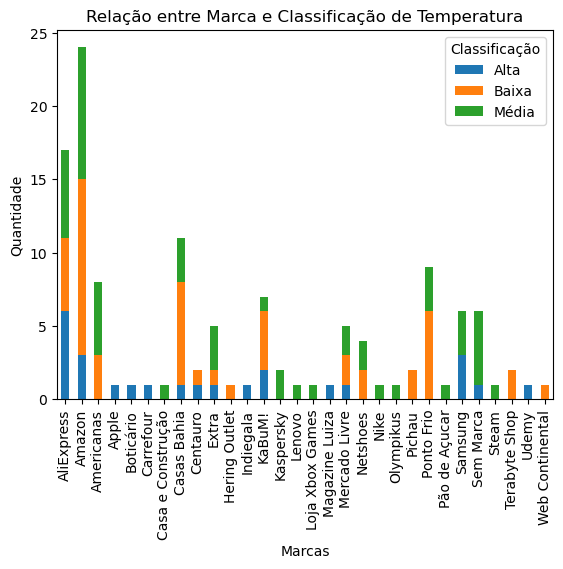

In [46]:
# Agrupar por marca e classificação, contar as ocorrências
contagem_marcas_classificacao = df.groupby(['Marca', 'Classificacao']).size().unstack(fill_value=0)

# Criar o gráfico de barras
contagem_marcas_classificacao.plot(kind='bar', stacked=True)

# Personalizar o gráfico
plt.title('Relação entre Marca e Classificação de Temperatura')
plt.xlabel('Marcas')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x, se necessário
plt.legend(title='Classificação')

# Exibir o gráfico
plt.show()


Por meio deste gráfico é possível visualizar todas as marcas e suas devidas temperaturas. Em azul, conclui-se que a AliExpress possui o maior número de compras com maior temperatura, mais relevantes entre o público. Além disso, como foi visto anteriormente, a AliExpress ainda faz parte das marcas que mais possuem produtos na base de dados que foi retirada do Pelando, o que mostra sua relevância neste site.

Outro ponto a se destacar, é que algumas marcas como a Apple, Boticário, Carrefour, etc, possuem poucos produtos disponíveis no site, porém o que estão disponíveis têm grande relevância entre os clientes.

### Análise Temperatura x Num de Comentários

Outra possível pesquisa é se existe a relação de quanto maior a temperatura, maior o número de comentários pelos usuários. Para isso, pode-se utilizar o coeficiente de correlação de Pearson e do valor-p que indica a força e a significância estatística da relação entre as variáveis:

In [61]:
df['Temperatura'] = pd.to_numeric(df['Temperatura'], errors='coerce').fillna(0)
df['Num de Comentários'] = pd.to_numeric(df['Num de Comentários'], errors='coerce').fillna(0)

correlation, p_value = pearsonr(df['Temperatura'], df['Num de Comentários'])

print(f"Coeficiente de correlação de Pearson: {correlation}")
print(f"Valor-p: {p_value}")


Coeficiente de correlação de Pearson: 0.7174746251376867
Valor-p: 4.81804451178721e-21


Neste caso, o coeficiente de correlação de Pearson é 0.717, o que indica uma correlação positiva moderada entre a temperatura e o número de comentários. Isso sugere que, em geral, à medida que a temperatura aumenta, o número de comentários tende a aumentar, mas não de forma perfeitamente linear.

Já o valor-p é muito baixo, próximo de 0 (4.81804451178721e-21), o que indica que a relação entre a temperatura e o número de comentários é altamente significativa estatisticamente. Isso sugere que a relação observada entre as variáveis não ocorre por acaso, mas é provável que haja uma relação genuína entre elas.

Para uma melhor visualização é possível fazer um gráfico de dispersão:

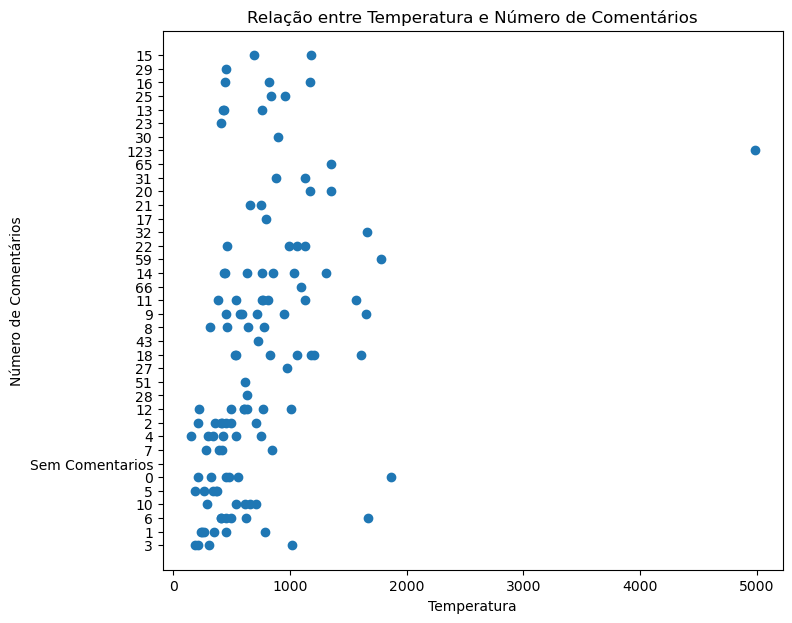

In [55]:
plt.figure(figsize=(8, 7))

# Criar o gráfico de dispersão
plt.scatter(df['Temperatura'], df['Num de Comentários'])

# Personalizar o gráfico
plt.title('Relação entre Temperatura e Número de Comentários')
plt.xlabel('Temperatura')
plt.ylabel('Número de Comentários')

# Exibir o gráfico
plt.show()

Olhando pelo gráfico, não parece haver uma correlação entre Comentários e Temperatura, entretanto, isso pode ocorrer em razão do outlier, representando um produto com uma temperatura muito maior que a do restante - destaque do produto. Além disso, esse outlier pode estar interferindo o valor-p e o coeficiente de correlação de Pearson. Desta forma, será feita a análise novamente, porém, desta vez, desconsiderando o outlier.

In [62]:
df_outlier = df[df['Temperatura'] != 4981.0]
df_outlier

,Titulo,Preço,Marca,Temperatura,Num de Comentários,Classificacao
0,Esponja Microfibra para limpar Vidros multiuso...,"R$ 1,70",Amazon,304.0,3.0,Baixa
1,Cadeira de escritório TGTTGT-OFC-001 TGT pre...,R$ 189,Pichau,187.0,3.0,Baixa
2,Creatina 300g (100% pura) - Max Titanium,"R$ 99,85",Amazon,235.0,1.0,Baixa
3,Noviça Balde com Escorredor Concept Capacidade...,"R$ 25,46",Amazon,212.0,3.0,Baixa
4,Papel Higiênico Neutro Folha Dupla Personal 30...,R$ 16,Mercado Livre,413.0,6.0,Baixa
...,...,...,...,...,...,...
120,Samsung (MZ-V8V500B/AM) 980 SSD 500 GB - M.2 N...,R$ 363,Amazon,423.0,4.0,Baixa
121,"3 meses de Kindle Unlimited por R$1,99 para no...","R$ 1,99",Amazon,834.0,25.0,Média
122,Base Suporte Notebook Regulável Refrigerada Ga...,"R$ 45,82",Americanas,407.0,6.0,Baixa
123,Mochila Reforçada Impermeável Masculina Femini...,R$ 119,Mercado Livre,425.0,13.0,Baixa


In [66]:
df_outlier = df_outlier.copy()
df_outlier.loc[:, 'Temperatura'] = pd.to_numeric(df_outlier['Temperatura'], errors='coerce').fillna(0)
df_outlier.loc[:, 'Num de Comentários'] = pd.to_numeric(df_outlier['Num de Comentários'], errors='coerce').fillna(0)

correlation, p_value = pearsonr(df_outlier['Temperatura'], df_outlier['Num de Comentários'])

print(f"Coeficiente de correlação de Pearson: {correlation}")
print(f"Valor-p: {p_value}")

Coeficiente de correlação de Pearson: 0.5007626526362028
Valor-p: 3.1629677980600493e-09


A mudança do valor do coeficiente de Pearson e do valor-p mudaram drasticamente com esta nova mudança, sendo que o coeficiente de Pearson está positivo moderado, mas menos lienar. Já o valor-p continua apontando uma correlação altamente significativa estatisticamente

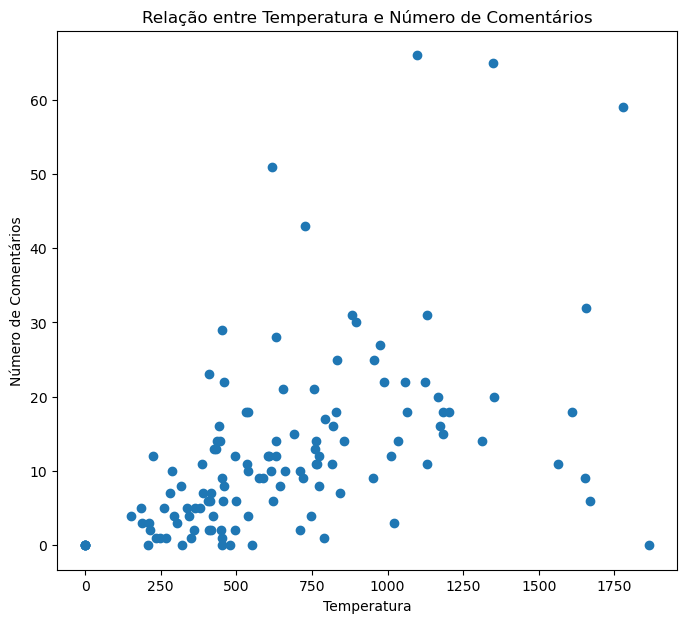

In [67]:
plt.figure(figsize=(8, 7))

# Criar o gráfico de dispersão
plt.scatter(df_outlier['Temperatura'], df_outlier['Num de Comentários'])

# Personalizar o gráfico
plt.title('Relação entre Temperatura e Número de Comentários')
plt.xlabel('Temperatura')
plt.ylabel('Número de Comentários')

# Exibir o gráfico
plt.show()

O gráfico agora está fazendo mais sentido quanto aos resultados do coeficiente e valor-p e realmente é possível observar uma tendência positiva linear da correlação entre temperatura e número de comentários.